# 🏠 House Prices Prediction using Random Forest
Compare R² score with Linear Regression and visualize feature importance.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:

# Load dataset
df = pd.read_csv("house_prices_dataset.csv")
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,price
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:

# Split features and target
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

# Linear Regression (Baseline)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

lr_r2 = r2_score(y_test, lr_preds)
print("Linear Regression R²:", lr_r2)


Linear Regression R²: 0.45260276297191915


In [5]:

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

rf_r2 = r2_score(y_test, rf_preds)
print("Random Forest R²:", rf_r2)


Random Forest R²: 0.4428225673999313


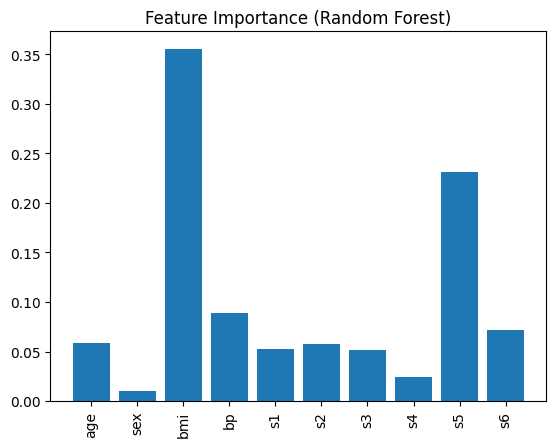

In [6]:

# Feature Importance Visualization
importances = rf.feature_importances_
features = X.columns

plt.figure()
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()
